                 TEAM_NAME  GP     MIN  POSS TEAM_ABBREVIATION  \
0            Atlanta Hawks  27  1301.0  2831               ATL   
1           Boston Celtics  26  1263.0  2601               BOS   
2            Brooklyn Nets  25  1210.0  2442               BKN   
3        Charlotte Hornets  25  1210.0  2460               CHA   
4            Chicago Bulls  26  1248.0  2724               CHI   
5      Cleveland Cavaliers  26  1248.0  2621               CLE   
6         Dallas Mavericks  26  1253.0  2641               DAL   
7           Denver Nuggets  23  1114.0  2369               DEN   
8          Detroit Pistons  26  1263.0  2593               DET   
9    Golden State Warriors  25  1205.0  2529               GSW   
10         Houston Rockets  26  1263.0  2617               HOU   
11          Indiana Pacers  27  1306.0  2753               IND   
12             LA Clippers  26  1253.0  2566               LAC   
13      Los Angeles Lakers  26  1253.0  2590               LAL   
14       M

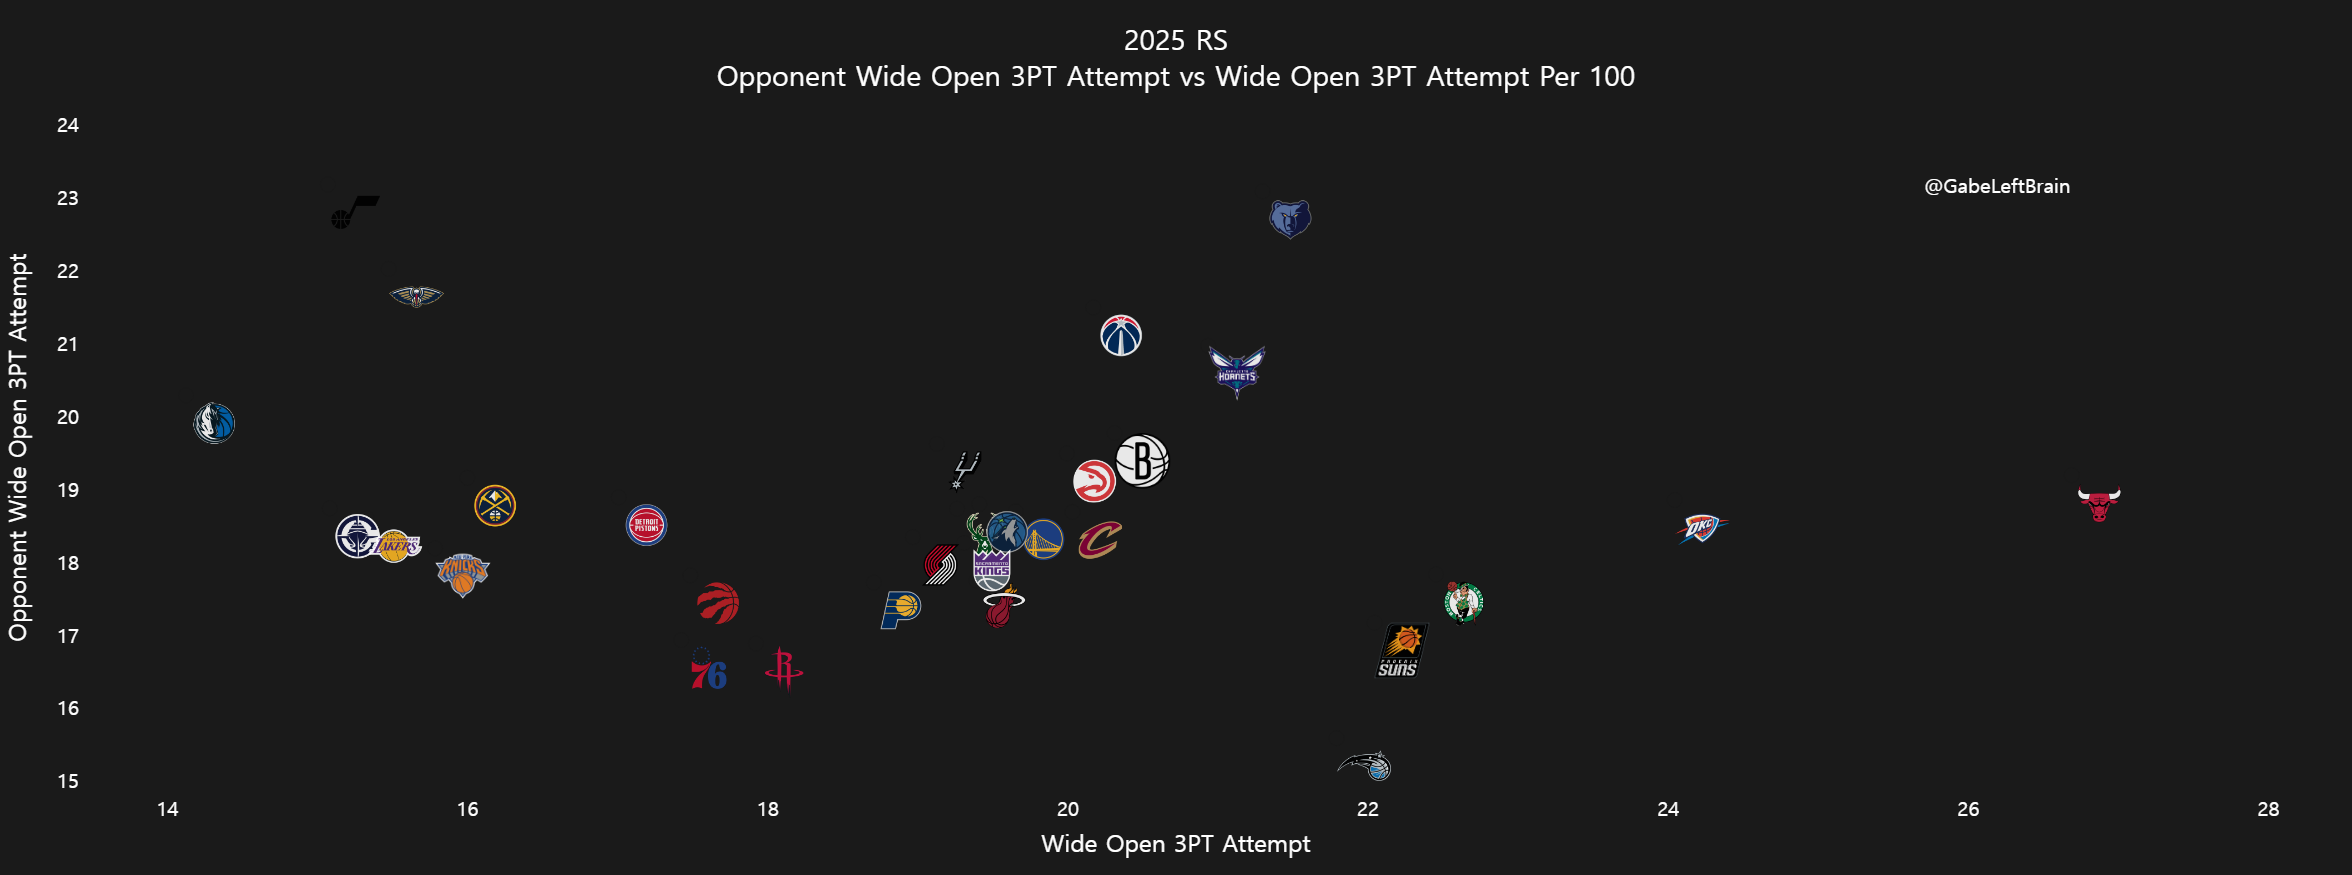

In [17]:
import pandas as pd
import requests
import plotly.graph_objects as go
import math
from scipy import stats
import string
import numpy as np
import time
from scipy.stats import zscore
import sys
import os
import glob
import statsmodels.api as sm

from nba_api.stats.static import players,teams

start_time = time.time()
directory = "data/2025"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm
from nba_api.stats.static import teams

def column_map2():
    column_mapping = {
    "POINTS": "POINTS",
    "True Shooting":"TS_PCT",
    "FGA": "FGA",
    "3PT Attempt": "FG3A",
    "AST": "AST",
    "FTA": "FTA",
    "OREB": "OREB",
    "DREB": "DREB",
    "REB": "REB",
    "TOV": "TOV",
    "STL": "STL",
    "BLK": "BLK",
    "Net Rating": "NET_RATING",
    "Offensive Rating":"OFF_RATING",
    "Defensive Rating":"DEF_RATING",
    "Usage":"Usage",
    "DRIVES": "DRIVES",
    "Drive Points": "DRIVE_PTS",
    "Pull Up Points": "PULL_UP_PTS",
    "Catch and Shoot Points": "CATCH_SHOOT_PTS",
    "3PT%": "FG3_PCT",

    "Catch and Shoot FGA": "CATCH_SHOOT_FGA",
    "Pull Up FGA": "PULL_UP_FGA",
    "Pull Up eFG%": "PULL_UP_EFG_PCT",

    "Pull Up FG3A":"PULL_UP_FG3A",
    "Catch and Shoot FG3A"   :"CATCH_SHOOT_FG3A",

    "Very Tight 3PT Attempt": "very_tight_FG3A",
    "Tight 3PT Attempt": "tight_FG3A",
    "Open 3PT Attempt": "open_FG3A",
    "Wide Open 3PT Attempt": "wide_open_FG3A",
    "Very Tight 3PT Attempt %": "very_tight_FG3_PCT",
    "Tight 3PT Attempt %": "tight_FG3_PCT",
    "Catch and Shoot EFG%": "CATCH_SHOOT_EFG_PCT",
    "Open 3PT%": "open_FG3_PCT",
    "Wide open 3PT%": "wide_open_FG3_PCT",

    "Opponent Very Tight 3PT Attempt": "opp_very_tight_FG3A",
    "Opponent Tight 3PT Attempt": "opp_tight_FG3A",
    "Opponent Open 3PT Attempt": "opp_open_FG3A",
    "Opponent Wide Open 3PT Attempt": "opp_wide_open_FG3A",
    "Opponent Very Tight 3PT Attempt %": "opp_very_tight_FG3_PCT",
    "Opponent Tight 3PT Attempt %": "opp_tight_FG3_PCT",
    "Opponent Catch and Shoot EFG%": "opp_CATCH_SHOOT_EFG_PCT",
    "Opponent Open 3PT%": "opp_open_FG3_PCT",
    "Opponent Wide open 3PT%": "opp_wide_open_FG3_PCT",
        
    "Contested Rebounds":"REB_CONTEST",
    "Adjusted OREB Chance %": "OREB_CHANCE_PCT_ADJ",
    "Adjusted DREB Chance %": "DREB_CHANCE_PCT_ADJ",
    "Potential Assist": "POTENTIAL_AST",
    "Freethrow Assist": "FT_AST",
    "Made Passes": "PASSES_MADE",
    "Passes Received": "PASSES_RECEIVED",
    "Touches": "TOUCHES",
    "Average Seconds Per Touch": "AVG_SEC_PER_TOUCH",
    "Average Dribble Per Touch": "AVG_DRIB_PER_TOUCH",
    "Time Of Possession": "TIME_OF_POSS",
    "AtRimFG3AFrequency": "AtRimFG3AFrequency",
    "LiveBallTurnovers": "LiveBallTurnovers",
    "BadPassTurnovers": "BadPassTurnovers",
    "Travels": "Travels",
    "BadPassSteals": "BadPassSteals",
     "Offensive Fouls Drawn":"Offensive Fouls Drawn",
    "LiveBallTurnoverPct": "LiveBallTurnoverPct",
    "Charge Fouls Drawn": "Charge Fouls Drawn",
    "AtRimPctAssisted": "AtRimPctAssisted",
    "BlockedAtRim": "BlockedAtRim",
    "AtRimAssists": "AtRimAssists",
    "SecondChanceAtRimFGA": "SecondChanceAtRimFGA",
    "AtRimFGA": "AtRimFGA",
    "AtRimAccuracy": "AtRimAccuracy",
    "SecondChanceFG2A": "SecondChanceFG2A",
    "PtsUnassisted2s": "PtsUnassisted2s",
    "PtsUnassisted3s": "PtsUnassisted3s",
    "ABOVE_BREAK_3_FGA": "ABOVE_BREAK_3_FGA",
    "ABOVE_BREAK_3_FG_PCT": "ABOVE_BREAK_3_FG_PCT"
    
    }

    return column_mapping
import plotly.graph_objects as go
import pandas as pd
import base64
import cairosvg
import io
import statsmodels.api as sm

# Define the NBA team logos dictionary
def graph_scatter(column1, column2, year, ps=False, mpg=10, gp=10, selected_rate='Per 100', team=None, team_list=[], remap={}):
    remap= {v: k for k, v in remap.items()}
    nba_team_logos ={'ATL': 'nba_team_logos/atl.svg', 'BOS': 'nba_team_logos/bos.svg', 'BKN': 'nba_team_logos/bkn.svg', 'CHA': 'nba_team_logos/cha.svg', 'CHI': 'nba_team_logos/chi.svg', 'CLE': 'nba_team_logos/cle.svg', 'DAL': 'nba_team_logos/dal.svg', 'DEN': 'nba_team_logos/den.svg', 'DET': 'nba_team_logos/det.svg', 'GSW': 'nba_team_logos/gsw.svg', 'HOU': 'nba_team_logos/hou.svg', 'IND': 'nba_team_logos/ind.svg', 'LAC': 'nba_team_logos/lac.svg', 'LAL': 'nba_team_logos/lal.svg', 'MEM': 'nba_team_logos/mem.svg', 'MIA': 'nba_team_logos/mia.svg', 'MIL': 'nba_team_logos/mil.svg', 'MIN': 'nba_team_logos/min.svg', 'NOP': 'nba_team_logos/nop.svg', 'NYK': 'nba_team_logos/nyk.svg', 'OKC': 'nba_team_logos/okc.svg', 'ORL': 'nba_team_logos/orl.svg', 'PHI': 'nba_team_logos/phi.svg', 'PHX': 'nba_team_logos/phx.svg', 'POR': 'nba_team_logos/por.svg', 'SAC': 'nba_team_logos/sac.svg', 'SAS': 'nba_team_logos/sas.svg', 'TOR': 'nba_team_logos/tor.svg', 'UTA': 'nba_team_logos/uta.svg', 'WAS': 'nba_team_logos/was.svg'}

    # File path adjusted for team-level data
    trail = '_ps' if ps else ''
    file_path = 'https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/'
    link = file_path + str(year) + trail + '_team_totals.csv'

    # Relevant columns for team-level analysis
    columns_to_read = [column1, column2, 'POSS', 'GP', 'TEAM_ABBREVIATION', 'MIN','TEAM_NAME']
    df = pd.read_csv(link, usecols=columns_to_read)
    bg_color = '#1a1a1a'
    # Drop missing data and calculate MPG
    df.dropna(subset=[column1, column2], inplace=True)
    df['MPG'] = df['MIN'] / df['GP']
    df = df[df.MPG >= mpg]
    df = df[df.GP >= gp]

    # Set default dot size and color
    df['size'] = 15
    dot_color = '#3e8989'
    dot_color_highlight = '#ffdb58'
    df['color'] = dot_color

        # Adjust percentages if applicable
    if any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[column1] *= 100
    if any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[column2] *= 100

    # Handle rate adjustments
    if selected_rate == 'Per 100':
        if not any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column1] = 100 * df[column1] / df.POSS
        if not any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column2] = 100 * df[column2] / df.POSS
    elif selected_rate == 'Per Game':
        if not any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column1] = df[column1] / df.GP
        if not any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column2] = df[column2] / df.GP

    # Highlight specific team
    df['opa'] = 0.6  # Default opacity
    if team:
        df.loc[df['TEAM_ABBREVIATION'] == team, 'color'] = dot_color_highlight
        df.loc[df['TEAM_ABBREVIATION'] == team, 'size'] = 25
        df.loc[df['TEAM_ABBREVIATION'] == team, 'opa'] = 1

    # Highlight specific teams in team_list
    if team_list:
        dot_color_team = '#ff7f7f'
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'color'] = dot_color_team
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'size'] = 30
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'opa'] = 1

    # Title setup
    pstring = 'Playoffs' if ps else 'RS'
    title_text = f"{year} {pstring}<br>{remap.get(column2, column2)} vs {remap.get(column1, column1)} {selected_rate}"

    # Hover text for teams
    hover_text = (
        "Team: " + df["TEAM_NAME"] +
        f"<br>{column1}: " + df[column1].round(1).astype(str) +
        f"<br>{column2}: " + df[column2].round(1).astype(str)
    )
    print(df)
    # Set axis ranges
    x_min, x_max = df[column1].min(), df[column1].max()
    y_min, y_max = df[column2].min(), df[column2].max()
    x_min_adjusted = x_min * 0.95
    x_max_adjusted = x_max * 1.05
    
    y_min_adjusted = y_min * 0.95
    y_max_adjusted = y_max * 1.05
    
    # Calculate the axis ranges
    x_range = x_max_adjusted - x_min_adjusted
    y_range = y_max_adjusted - y_min_adjusted
    
    # Set logo size relative to axis range (e.g., 2% of the x and y axis range)
    logo_size_x = x_range * 0.08  # Adjust this percentage as needed (e.g., 2%)
    logo_size_y = y_range * 0.08  # Adjust this percentage as needed (e.g., 2%)
    

    # Scatter Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df[column1],
        y=df[column2],
        mode='markers',
        hovertext=hover_text,
        textposition="bottom center",
        showlegend=False,
        marker=dict(
            color=bg_color,
            opacity=df['opa'],
            line=dict(color=bg_color, width=0.3),
            size=df['size'],
        ),
        textfont=dict(
            family="Malgun Gothic",
            size=18,
            color=dot_color_highlight
        )
    ))

    # Add team logos as images (SVG converted to PNG for markers)
    for i, row in df.iterrows():
        team_abbr = row['TEAM_ABBREVIATION']
        logo_url = nba_team_logos.get(team_abbr)
        if logo_url:
            logo_svg = cairosvg.svg2png(url=logo_url)
            encoded_image = base64.b64encode(logo_svg).decode()

            fig.add_layout_image(
                dict(
                    source="data:image/png;base64," + encoded_image,
                    x=row[column1],
                    y=row[column2],
                    xref="x",
                    yref="y",
                    sizex=logo_size_x,
                    sizey=logo_size_y,
                    opacity=0.9,
                    layer="above"
                )
            )

    fig.update_xaxes(title_text = remap[column1],showline=False,  gridcolor='#f2f5fa' ,showgrid=False)
    fig.update_yaxes(title_text = remap[column2],showline=False,gridcolor='#f2f5fa',showgrid=False)

    fig.update_layout(
        width = 1225,
        height = 875,
        xaxis=dict(range=[x_min*.95, x_max*1.05]),
        yaxis=dict(range=[y_min*.95, y_max*1.05]),
        title = title_text,
        title_x=.5,
        autosize=True,
        paper_bgcolor=bg_color,
        plot_bgcolor=bg_color,
                        
        font=dict(
            family="Malgun Gothic",
            size=20,
            color='white'
        ),
                       
        
        annotations=[
        go.layout.Annotation(
            showarrow=False,
            text='@GabeLeftBrain',
            y=y_max,
            x=x_max- .5
            
        )
        ]
    )  
    return fig

# Example usage


fig=graph_scatter('wide_open_FG3A','opp_wide_open_FG3A',2025,remap=column_map())
fig.show()

In [12]:
import requests
import os

# Dictionary of team acronyms and their logo URLs
nba_team_logos = {
    'ATL': 'https://upload.wikimedia.org/wikipedia/en/2/24/Atlanta_Hawks_logo.svg',
    'BOS': 'https://cdn.nba.com/logos/nba/1610612738/primary/L/logo.svg',
    'BKN': 'https://upload.wikimedia.org/wikipedia/en/4/40/Brooklyn_Nets_primary_icon_logo_2024.svg',
    'CHA': 'https://upload.wikimedia.org/wikipedia/en/c/c4/Charlotte_Hornets_%282014%29.svg',
    'CHI': 'https://cdn.nba.com/teams/uploads/sites/1610612741/2021/10/bulls-svg.svg',
    'CLE': 'https://upload.wikimedia.org/wikipedia/commons/4/4b/Cleveland_Cavaliers_logo.svg',
    'DAL': 'https://upload.wikimedia.org/wikipedia/en/9/97/Dallas_Mavericks_logo.svg',
    'DEN': 'https://upload.wikimedia.org/wikipedia/en/7/76/Denver_Nuggets.svg',
    'DET': 'https://upload.wikimedia.org/wikipedia/commons/c/c9/Logo_of_the_Detroit_Pistons.svg',
    'GSW': 'https://upload.wikimedia.org/wikipedia/en/0/01/Golden_State_Warriors_logo.svg',
    'HOU': 'https://upload.wikimedia.org/wikipedia/en/2/28/Houston_Rockets.svg',
    'IND': 'https://upload.wikimedia.org/wikipedia/en/1/1b/Indiana_Pacers.svg',
    'LAC': 'https://upload.wikimedia.org/wikipedia/en/e/ed/Los_Angeles_Clippers_%282024%29.svg',
    'LAL': 'https://upload.wikimedia.org/wikipedia/commons/3/3c/Los_Angeles_Lakers_logo.svg',
    'MEM': 'https://upload.wikimedia.org/wikipedia/en/f/f1/Memphis_Grizzlies.svg',
    'MIA': 'https://upload.wikimedia.org/wikipedia/en/f/fb/Miami_Heat_logo.svg',
    'MIL': 'https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg',
    'MIN': 'https://upload.wikimedia.org/wikipedia/en/c/c2/Minnesota_Timberwolves_logo.svg',
    'NOP': 'https://upload.wikimedia.org/wikipedia/en/0/0d/New_Orleans_Pelicans_logo.svg',
    'NYK': 'https://upload.wikimedia.org/wikipedia/en/2/25/New_York_Knicks_logo.svg',
    'OKC': 'https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg',
    'ORL': 'https://upload.wikimedia.org/wikipedia/en/1/10/Orlando_Magic_logo.svg',
    'PHI': 'https://upload.wikimedia.org/wikipedia/en/0/0e/Philadelphia_76ers_logo.svg',
    'PHX': 'https://upload.wikimedia.org/wikipedia/en/d/dc/Phoenix_Suns_logo.svg',
    'POR': 'https://upload.wikimedia.org/wikipedia/en/2/21/Portland_Trail_Blazers_logo.svg',
    'SAC': 'https://upload.wikimedia.org/wikipedia/en/c/c7/SacramentoKings.svg',
    'SAS': 'https://upload.wikimedia.org/wikipedia/en/a/a2/San_Antonio_Spurs.svg',
    'TOR': 'https://upload.wikimedia.org/wikipedia/en/3/36/Toronto_Raptors_logo.svg',
    'UTA': 'https://upload.wikimedia.org/wikipedia/en/5/52/Utah_Jazz_logo_2022.svg',
    'WAS': 'https://upload.wikimedia.org/wikipedia/en/0/02/Washington_Wizards_logo.svg'
}
nba_team_logs={}

index =pd.read_csv('game_report/index_master.csv')
index=index[index.team!='TOT']
index = index[index.year==2024]

team_ids=dict(zip(index.team,index.team_id))
for team in index.team.unique():
    nba_team_logos[team.upper()]='https://cdn.nba.com/logos/nba/'+str(team_ids[team])+'/primary/L/logo.svg'
print(nba_team_logos)
# Directory to save the logos
save_dir = "nba_team_logos"
os.makedirs(save_dir, exist_ok=True)

# Download and save each logo
for team, url in nba_team_logos.items():
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if request was successful
        # Save the SVG with the team's acronym (lowercase)
        file_path = os.path.join(save_dir, f"{team.lower()}.svg")
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded and saved {team.lower()}.svg")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {team}: {e}")

# Create a dictionary referencing local files
nba_team_logos_local = {team: os.path.join(save_dir, f"{team.lower()}.svg") for team in nba_team_logos}

# Display the new dictionary
print("\nLocal team logos dictionary:")
print(nba_team_logos_local)
nba_team_logos_local = {team: os.path.join(save_dir, f"{team.lower()}.svg") for team in nba_team_logos}


{'ATL': 'https://cdn.nba.com/logos/nba/1610612737/primary/L/logo.svg', 'BOS': 'https://cdn.nba.com/logos/nba/1610612738/primary/L/logo.svg', 'BKN': 'https://upload.wikimedia.org/wikipedia/en/4/40/Brooklyn_Nets_primary_icon_logo_2024.svg', 'CHA': 'https://upload.wikimedia.org/wikipedia/en/c/c4/Charlotte_Hornets_%282014%29.svg', 'CHI': 'https://cdn.nba.com/logos/nba/1610612741/primary/L/logo.svg', 'CLE': 'https://cdn.nba.com/logos/nba/1610612739/primary/L/logo.svg', 'DAL': 'https://cdn.nba.com/logos/nba/1610612742/primary/L/logo.svg', 'DEN': 'https://cdn.nba.com/logos/nba/1610612743/primary/L/logo.svg', 'DET': 'https://cdn.nba.com/logos/nba/1610612765/primary/L/logo.svg', 'GSW': 'https://cdn.nba.com/logos/nba/1610612744/primary/L/logo.svg', 'HOU': 'https://cdn.nba.com/logos/nba/1610612745/primary/L/logo.svg', 'IND': 'https://cdn.nba.com/logos/nba/1610612754/primary/L/logo.svg', 'LAC': 'https://cdn.nba.com/logos/nba/1610612746/primary/L/logo.svg', 'LAL': 'https://cdn.nba.com/logos/nba/161